<a href="https://colab.research.google.com/github/fboldt/aulasann/blob/main/aula07b_mnist_conv_keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Convolutional Neural Network

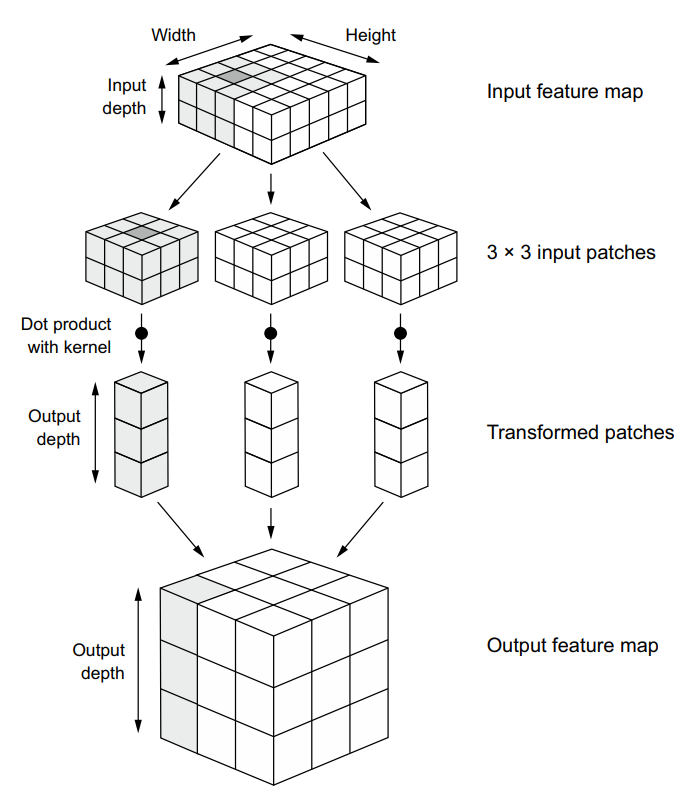

#Intuition

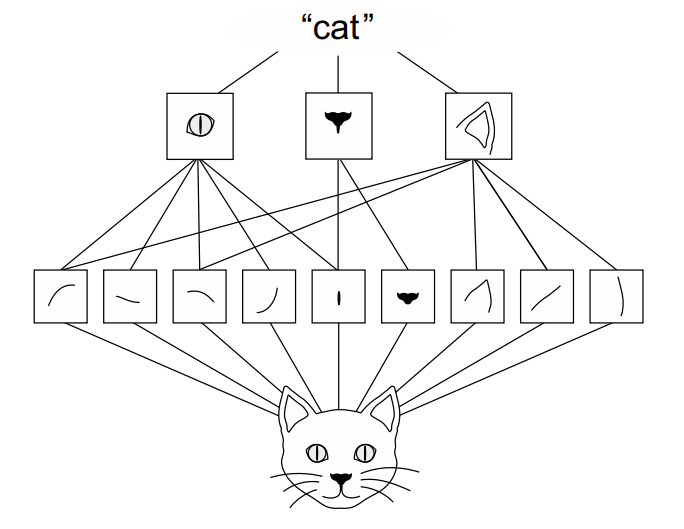

In [1]:
from tensorflow.keras.datasets import mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()
print(train_images.shape)
print(train_labels.shape)
print(test_images.shape)
print(test_labels.shape)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


In [2]:
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.base import BaseEstimator, ClassifierMixin
from sklearn.metrics import accuracy_score
import numpy as np

def KerasCNN2D(num_classes):
  return keras.Sequential([
    layers.Conv2D(4, 4, activation='relu'),
    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dense(num_classes, activation='softmax')
  ])

class KerasWrappedNN(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128, model_fabric=KerasCNN2D):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model_fabric = model_fabric

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids, len(self.labels))
    self.model = self.model_fabric(len(np.unique(y)))
    self.model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    self.model.fit(
        X, yhot,
        epochs=self.epochs,
        batch_size=self.batch_size
    )
    return self

  def predict(self, X):
    y_proba = self.model.predict(X)
    return self.labels[np.argmax(y_proba, axis=1)]


In [3]:
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

class Divide255(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X / 255.0

class Shape2Keras(BaseEstimator, TransformerMixin):
  def fit(self, X, y=None):
    return self
  def transform(self, X):
    return X.reshape((-1, 28, 28, 1))

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("shape2keras", Shape2Keras()),
    ("model", KerasWrappedNN())
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 6s 4ms/step - accuracy: 0.8671 - loss: 0.4395
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9759 - loss: 0.0806
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9862 - loss: 0.0472
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9915 - loss: 0.0286
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9946 - loss: 0.0186
313/313 ━━━━━━━━━━━━━━━━━━━━ 3s 8ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9804

In [4]:
def KerasCNN2D(input_shape, num_classes):
  inputs = keras.Input(shape=input_shape)
  x = layers.Conv2D(filters=32, kernel_size=3, activation='relu')(inputs)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=64, kernel_size=3, activation='relu')(x)
  x = layers.MaxPooling2D(pool_size=2)(x)
  x = layers.Conv2D(filters=128, kernel_size=3, activation='relu')(x)
  x = layers.Flatten()(x)
  outputs = layers.Dense(num_classes, activation='softmax')(x)
  return keras.Model(inputs=inputs, outputs=outputs)

model = KerasCNN2D((28, 28, 1), 10)
model.summary()

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_1 (InputLayer)      │ (None, 28, 28, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 3, 3, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │        11,530 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 104,202 (407.04 KB)

 Trainable params: 104,202 (407.04 KB)

 Non-trainable params: 0 (0.00 B)

In [6]:
class KerasWrappedNN(BaseEstimator, ClassifierMixin):
  def __init__(self, epochs=5, batch_size=128, model_fabric=KerasCNN2D):
    self.epochs = epochs
    self.batch_size = batch_size
    self.model_fabric = model_fabric

  def fit(self, X, y):
    self.labels, ids = np.unique(y, return_inverse=True)
    yhot = keras.utils.to_categorical(ids, len(self.labels))
    self.model = self.model_fabric(X.shape[1:], len(np.unique(y)))
    self.model.compile(
        optimizer='rmsprop',
        loss='categorical_crossentropy',
        metrics=['accuracy']
    )
    self.model.fit(
        X, yhot,
        epochs=self.epochs,
        batch_size=self.batch_size
    )
    return self

  def predict(self, X):
    y_proba = self.model.predict(X)
    return self.labels[np.argmax(y_proba, axis=1)]

pipeline = Pipeline([
    ("scaler", Divide255()),
    ("shape2keras", Shape2Keras()),
    ("model", KerasWrappedNN(model_fabric=KerasCNN2D))
])

pipeline.fit(train_images, train_labels)
y_pred = pipeline.predict(test_images)
accuracy_score(test_labels, y_pred)

Epoch 1/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 7ms/step - accuracy: 0.8438 - loss: 0.4963
Epoch 2/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9819 - loss: 0.0592
Epoch 3/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9882 - loss: 0.0382
Epoch 4/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9915 - loss: 0.0279
Epoch 5/5
469/469 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9935 - loss: 0.0216
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


/usr/local/lib/python3.12/dist-packages/sklearn/pipeline.py:62: FutureWarning: This Pipeline instance is not fitted yet. Call 'fit' with appropriate arguments before using other methods such as transform, predict, etc. This will raise an error in 1.8 instead of the current warning.
  warnings.warn(


0.9914